In [1]:
import numpy as np
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
gs=pd.read_csv('GS_2006-01-01_to_2018-01-01.csv')

In [3]:
gs.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,126.70,129.44,124.23,128.87,6188700,GS
1,2006-01-04,127.35,128.91,126.38,127.09,4862000,GS
2,2006-01-05,126.00,127.32,125.61,127.04,3717600,GS
3,2006-01-06,127.29,129.25,127.29,128.84,4319600,GS
4,2006-01-09,128.50,130.62,128.00,130.39,4723500,GS


In [4]:
gs['Date']=pd.to_datetime(gs['Date'])

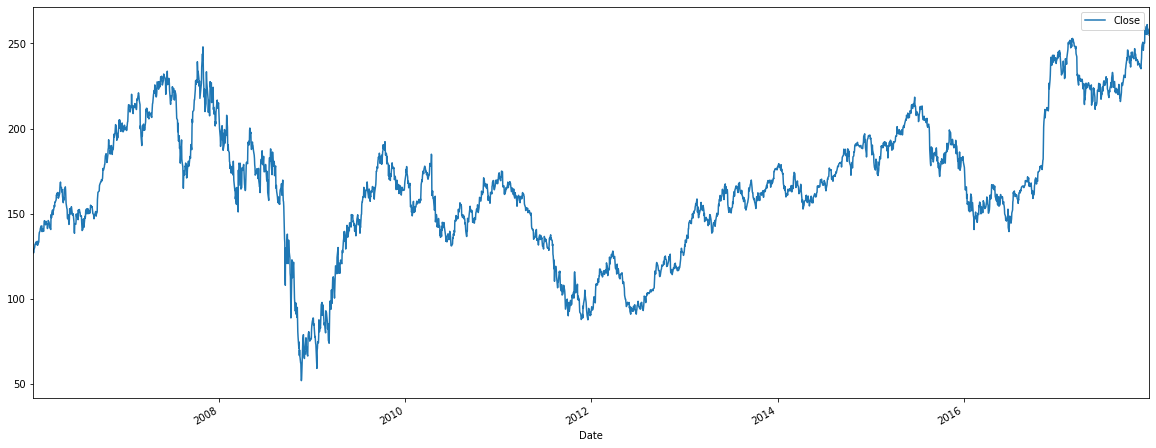

In [5]:
gs.plot(x='Date',y='Close',figsize=(20,8))

In [6]:
gs['close_log']=np.log10(gs['Close'])

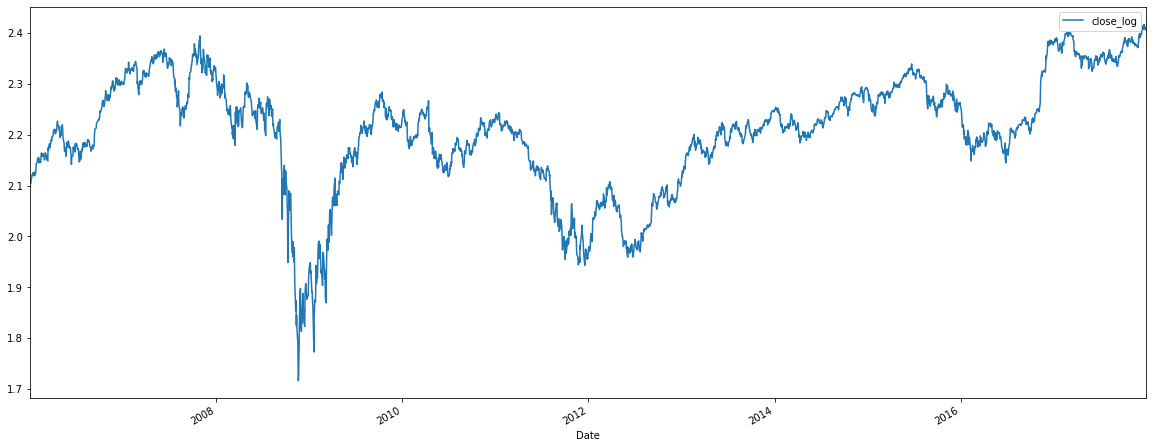

In [7]:
gs.plot(x='Date',y='close_log',figsize=(20,8))

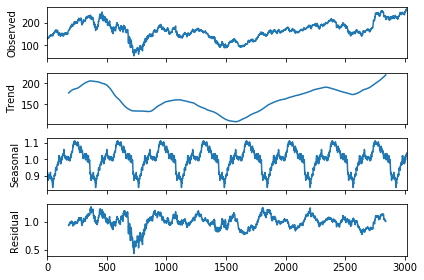

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(gs['Close'], model='multiplicative',freq=360)
fig = decomposition.plot()


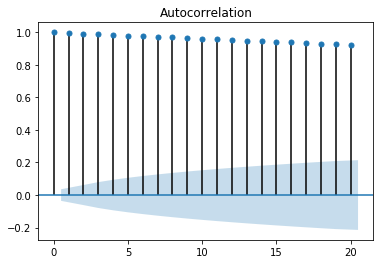

In [9]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(gs['Close'], lags=20)
plt.show()

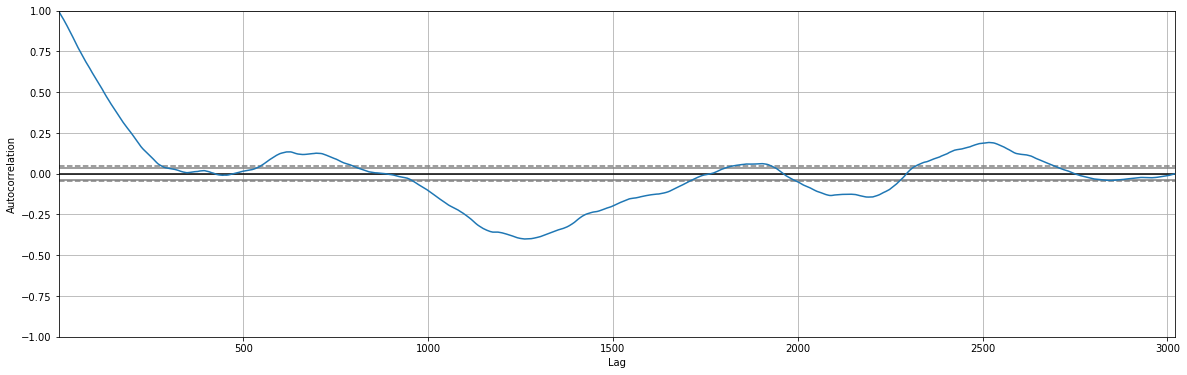

In [10]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize = (20,6))
autocorrelation_plot(gs['Close'])
plt.show()

In [11]:
#Since the correlation dies gradually over time, it suggests that the series is non-stationery.

In [12]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(gs['Close'])
result_ = pd.Series(result[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in result[4].items():
    result_['Critical Value (%s)' %key] = value
print(result_)

Test Statistic                   -1.770942
p-value                           0.394981
#Lags Used                       17.000000
Number of Observations Used    3002.000000
Critical Value (1%)              -3.432530
Critical Value (5%)              -2.862503
Critical Value (10%)             -2.567283
dtype: float64


In [13]:
#Since p-value > 0.05, the series is non-stationary.
#From the above two tests, we can conclude that the series is non-stationery.
#We can use ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3019
Model:                 ARIMA(2, 1, 1)   Log Likelihood               -7871.440
Method:                       css-mle   S.D. of innovations              3.282
Date:                Mon, 02 Sep 2019   AIC                          15752.881
Time:                        16:01:41   BIC                          15782.944
Sample:                             1   HQIC                         15763.691
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0418      0.056      0.741      0.459      -0.069       0.152
ar.L1.D.Close    -0.8939      0.132     -6.751      0.000      -1.153      -0.634
ar.L2.D.Close    -0.0585      0.018     

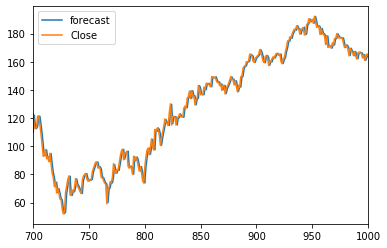

In [14]:
from statsmodels.tsa.arima_model import ARIMA


model = ARIMA(gs["Close"], order=(2,1,1))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()